In [64]:
# Section 1 - Run a basic and Simple Regression Model

In [65]:
# note the basic equation is y= ax + b

In [66]:
# Hoston Housing Data discription:https://www.kaggle.com/prasadperera/the-boston-housing-dataset

In [149]:
import pandas as pd
import numpy as np
df = pd.read_csv('BostonHousing.csv')
# Print first 10 rows
print(df.head(10))
# Print all column names
print(list(df))
# Select columns
# Select CRIM - per capita crime rate by town & Median value of owner-occupied homes in $1000's
cols = ['lstat','medv']
df_sel = df[cols]
# Drop missing value
df_sel.dropna(inplace = True)

# Statistical details of selected dataset
print(df_sel.describe())

# find correlation coefficient
print('Correlation coefficient:',df_sel['lstat'].corr(df_sel['medv']))

      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.6

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [150]:
# Step 2 - Plot and Visualize Data

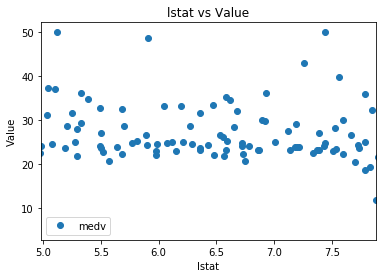

In [151]:
import matplotlib.pyplot as plt  
x = 'lstat'
y = 'medv'
df_sel.plot(x, y, style='o')  
plt.title('lstat vs Value')  
plt.xlabel('lstat')  
plt.ylabel('Value')  
plt.show()

In [158]:
# Practice 1 - Plot 'DIS (weighted distances to five Boston employment centres)' vs 'Median Value'

import pandas as pd
import numpy as np
df = pd.read_csv('BostonHousing.csv')
# Print first 10 rows
print(df.head(10))
# Print all column names
print(list(df))
# Select columns
# Select CRIM - per capita crime rate by town & Median value of owner-occupied homes in $1000's
cols = ['dis','medv']
df_sel = df[cols]
# Drop missing value
df_sel.dropna(inplace = True)

# Statistical details of selected dataset
print(df_sel.describe())

# find correlation coefficient
print('Correlation coefficient:',df_sel['dis'].corr(df_sel['medv']))

      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.6

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


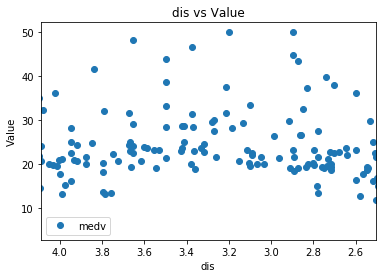

In [159]:

import matplotlib.pyplot as plt  
x = 'dis'
y = 'medv'
df_sel.plot(x, y, style='o')  
plt.title('dis vs Value')  
plt.xlabel('dis')  
plt.ylabel('Value')  
plt.show()

In [157]:
# Section 2 - Regression plot

-0.950049353757992 34.55384087938312


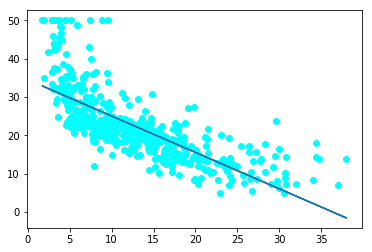

In [131]:
# now calculate and plot best fit line
# convert dataframe column to array
from statistics import mean

xs = np.array(df_sel[x].tolist(), dtype=np.float64)
ys = np.array(df_sel[y].tolist(), dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    a = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - a*mean(xs)
    
    return a, b

a, b = best_fit_slope_and_intercept(xs,ys)


# y = ax+b
print(a,b)

# calculate regression line (predicted y values on regression line)
regression_line = []
for x_value in xs:
    regression_line.append((a*x_value)+b)
plt.scatter(xs,ys,color='aqua')
plt.plot(xs, regression_line)
plt.show()

In [132]:
# Use the equation above , find out the difference between predicted y and actual y values

In [133]:
# Measure the difference using MSE and RMSE

y_predicted = regression_line

# mean squared error
mse = np.sum((y_predicted - ys)**2)
print('mean squared error is: ',mse)

# root mean squared error
# n is the number of training examples
n = len(y_predicted)
rmse = np.sqrt(mse/n)
print('root mean squared error is: ',rmse)

# r2 score
from sklearn.metrics import r2_score
print(r2_score(xs, ys))

mean squared error is:  19472.38141832644
root mean squared error is:  6.20346413142642
-5.476727649896687


In [134]:
# Section 3 - Now run the same example in Sci-kit learn

In [135]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
# Prepare data
xs2=xs.reshape(-1,1)
ys2=ys.reshape(-1,1)

reg.fit(xs2, ys2)
y_pred = reg.predict(xs2)

In [136]:
# Evaluate results
# mean squared error
mse = np.sum((y_pred - ys2)**2)
print('mean squared error is: ',mse)

# root mean squared error
# n is the number of training examples
n = len(y_pred)
rmse = np.sqrt(mse/n)
print('root mean squared error is: ',rmse)

mean squared error is:  19472.381418326437
root mean squared error is:  6.203464131426419


In [137]:
# Section 4 - What if this is a simple prediction question
# Predict value based on Crime?

In [138]:
# prepare training and testing data
from sklearn import linear_model
reg = linear_model.LinearRegression()

# get total number of data and use onl 30%
n_tot = len(xs2)
print(n_tot)

# use 70 for training
train_x = xs2[:int(n_tot*0.7)]
train_y = ys2[:int(n_tot*0.7)]
test_x = xs2[int(n_tot*0.7):]
test_y = ys2[int(n_tot*0.7):]

# fit data
reg.fit(train_x, train_y)
y_pred_new = reg.predict(test_x)

# note the actual results for the test are test_y

506


In [140]:
# Evaluate results
# mean squared error
mse = np.sum((y_pred_new - test_y)**2)
print('mean squared error is: ',mse)

# root mean squared error
# n is the number of training examples
n = len(y_pred_new)
rmse = np.sqrt(mse/n)
print('root mean squared error is: ',rmse)

mean squared error is:  5712.485425447057
root mean squared error is:  6.130427469344086


In [147]:
# What do you think? Good results?
print('I think the results are fine, but it is overall questionable if using multiple linear regression models and MSE and RMSE alone can predict for housing prices. Perhaps P values would be helpful?')
# Can you find a better predictor for housing price?
print('The best predictor was LSTAT, which was % of lower status of the population. The next next predictor was INDUS which is the proportion of non-retail business acres per town. LSTAT has a MSE of 5712.4854 and a RMSE of 6.13042. The lower numbers indicate that the model is improving. Plus, there was the least amount of variance on the graph with the best fit line. ')
# Based on your findings, can you produce a simple prediction model based on linear regression
print('I think in this situation, you can produce a simple prediction model based on linear regression since we are only testing for a single outcome. The outcome variable relates to a single variable being LSTAT. It is a good simplification of reality overall, but including P values and other variables would make the model more complex but better at indicating. Overall  I though this exercise was really cool that we ultimately determined housing prices were as a result of the percentage of population that the census classifies as lower status, which wasn\'t very surprising given our economic and political system.' )
# Don't forget to evaluate your result
# Submit your script and provide comments for your results and findings (This is the exercise for the week)

I think the results are fine, but it is overall questionable if using multiple linear regression models and MSE and RMSE alone can predict for housing prices. Perhaps P values would be helpful?
The best predictor was LSTAT, which was % of lower status of the population. The next next predictor was INDUS which is the proportion of non-retail business acres per town. LSTAT has a MSE of 5712.4854 and a RMSE of 6.13042. The lower numbers indicate that the model is improving. Plus, there was the least amount of variance on the graph with the best fit line. 
I think in this situation, you can produce a simple prediction model based on linear regression since we are only testing for a single outcome. The outcome variable relates to a single variable being LSTAT. It is a good simplification of reality overall, but including P values and other variables would make the model more complex but better at indicating. Overall  I though this exercise was really cool that we ultimately determined housi

In [82]:
# Bonus question: 
# Use your model for California
# Try their dataset https://www.kaggle.com/camnugent/california-housing-prices
# Any difference? Why?